In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [7]:
myData = pd.read_csv('diabetes.tsv', delimiter='\t')
myData

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310


In [16]:
Y = myData.iloc[:,-1].values

In [17]:
X = myData.iloc[:,2:3].values

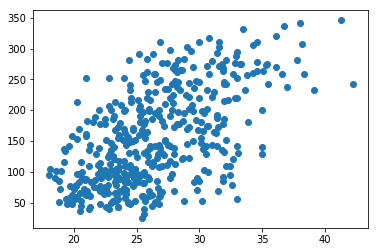

In [19]:
plt.scatter(X,Y)
plt.show()

In [26]:
np.corrcoef(X[:,0], Y)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

In [33]:
# Split the data into training/testing sets
diabetes_X_train = X[:-20]
diabetes_X_test = X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = Y[:-20]
diabetes_y_test = Y[-20:]

In [34]:
# Create linear regression object
regression = linear_model.LinearRegression()

# Train the model using the training sets
regression.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# Make predictions using the testing set
diabetes_y_pred = regression.predict(diabetes_X_test)

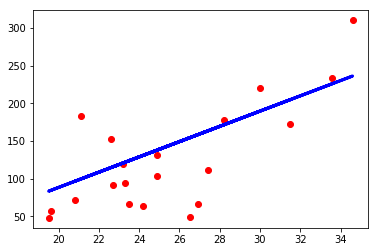

In [38]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='r')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()